#  Multiple Linear Regression (MLR) mini project

In [122]:
pip install  scipy

Note: you may need to restart the kernel to use updated packages.


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"]  = (10, 6)

import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [124]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# Multiple Linear Regression (MLR)

In [125]:
df.info

<bound method DataFrame.info of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

In [126]:
df.shape

(7385, 12)

In [127]:
df.sample()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6627,BMW,X4 M,SUV - SMALL,3.0,6,AS8,Z,16.6,12.1,14.6,19,339


In [128]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [129]:
import missingno as msno
msno.matrix(df);

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [131]:
df.corr

<bound method DataFrame.corr of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                       

In [132]:
sns.heatmap(df.corr(), annot = True);

In [133]:
#sns.pairplot(df);

In [134]:
df.columns


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [135]:
#Engine Size(L),
#Fuel Consumption Comb (L/100 km),
#Fuel Consumption Hwy (L/100 km),
#Fuel Consumption City (L/100 km),
#CO2 Emissions(g/km) columnlarını kullanacaksınız.

In [136]:
df = df.iloc[:, [3,7,8,9, 11]]
df.head()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [137]:
#df.corr()

In [138]:
#sns.scatterplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)",data =df);

In [139]:
#x = df["Engine Size(L)"]
#y = df["CO2 Emissions(g/km)"]

In [140]:
df = df.rename(columns={'Engine Size(L)': 'Engine_Size'})
df = df.rename(columns={'CO2 Emissions(g/km)': 'CO2_Emissions'})
df = df.rename(columns={'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City_L/100km'})
df = df.rename(columns={'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy_L/100km'})
df = df.rename(columns={'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb_L/100km'})

In [141]:
df

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,219
7381,2.0,11.2,8.3,9.9,232
7382,2.0,11.7,8.6,10.3,240
7383,2.0,11.2,8.3,9.9,232


In [142]:
df.sort_values(by = "CO2_Emissions", ascending = False)

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
5575,8.0,26.8,16.6,22.2,522
6640,8.0,26.8,16.6,22.2,522
4509,8.0,26.8,16.6,22.2,522
7059,6.5,26.6,15.8,21.7,493
6046,6.5,26.6,15.8,21.7,493
...,...,...,...,...,...
6949,1.6,4.2,4.2,4.2,99
5931,1.6,4.2,4.0,4.1,96
4900,1.6,4.2,4.0,4.1,96
6950,1.6,4.2,4.0,4.1,96


In [143]:
df.describe().T
# mean  ve std arasında  bir fark var   dolayısı ile outlier yok gibi.

,count,mean,std,min,25%,50%,75%,max
Engine_Size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Fuel_Consumption_City_L/100km,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel_Consumption_Hwy_L/100km,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel_Consumption_Comb_L/100km,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2_Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [144]:
sns.pairplot(df);

In [145]:
df

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,219
7381,2.0,11.2,8.3,9.9,232
7382,2.0,11.7,8.6,10.3,240
7383,2.0,11.2,8.3,9.9,232


In [179]:
sns.heatmap(df.corr(), annot = True);

In [147]:
df.columns

Index(['Engine_Size', 'Fuel_Consumption_City_L/100km',
       'Fuel_Consumption_Hwy_L/100km', 'Fuel_Consumption_Comb_L/100km',
       'CO2_Emissions'],
      dtype='object')

In [148]:
from scipy.stats import skew

In [149]:
for i in df.drop(columns = "CO2_Emissions").columns:
    print(i, skew(df[i]))

Engine_Size 0.8090166237091084
Fuel_Consumption_City_L/100km 0.8088403827811873
Fuel_Consumption_Hwy_L/100km 1.078997475325438
Fuel_Consumption_Comb_L/100km 0.8931342662031229


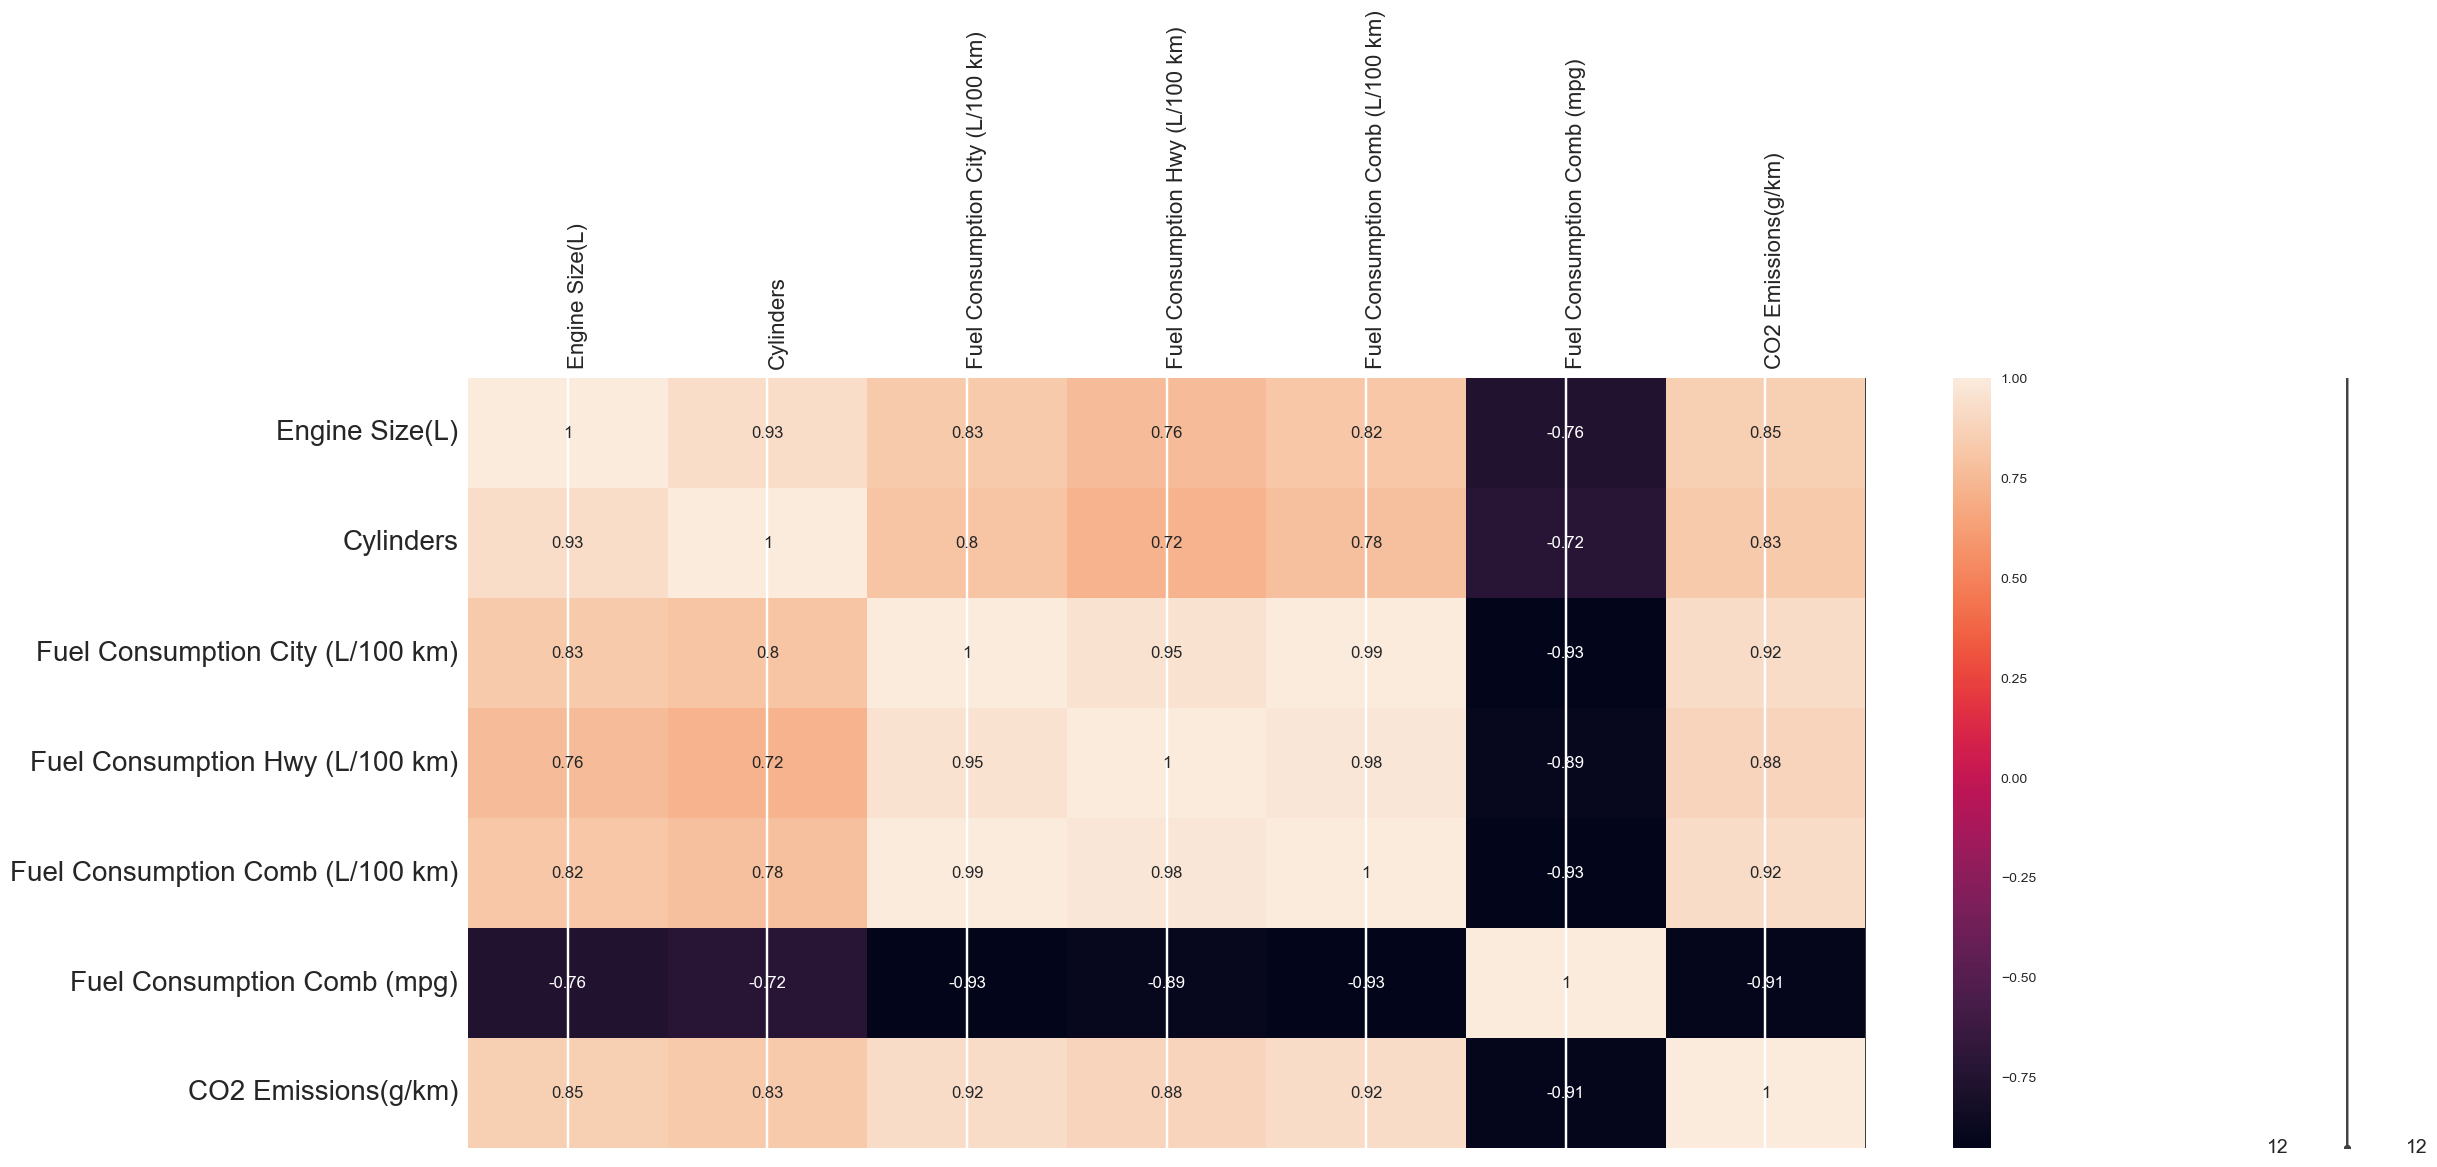

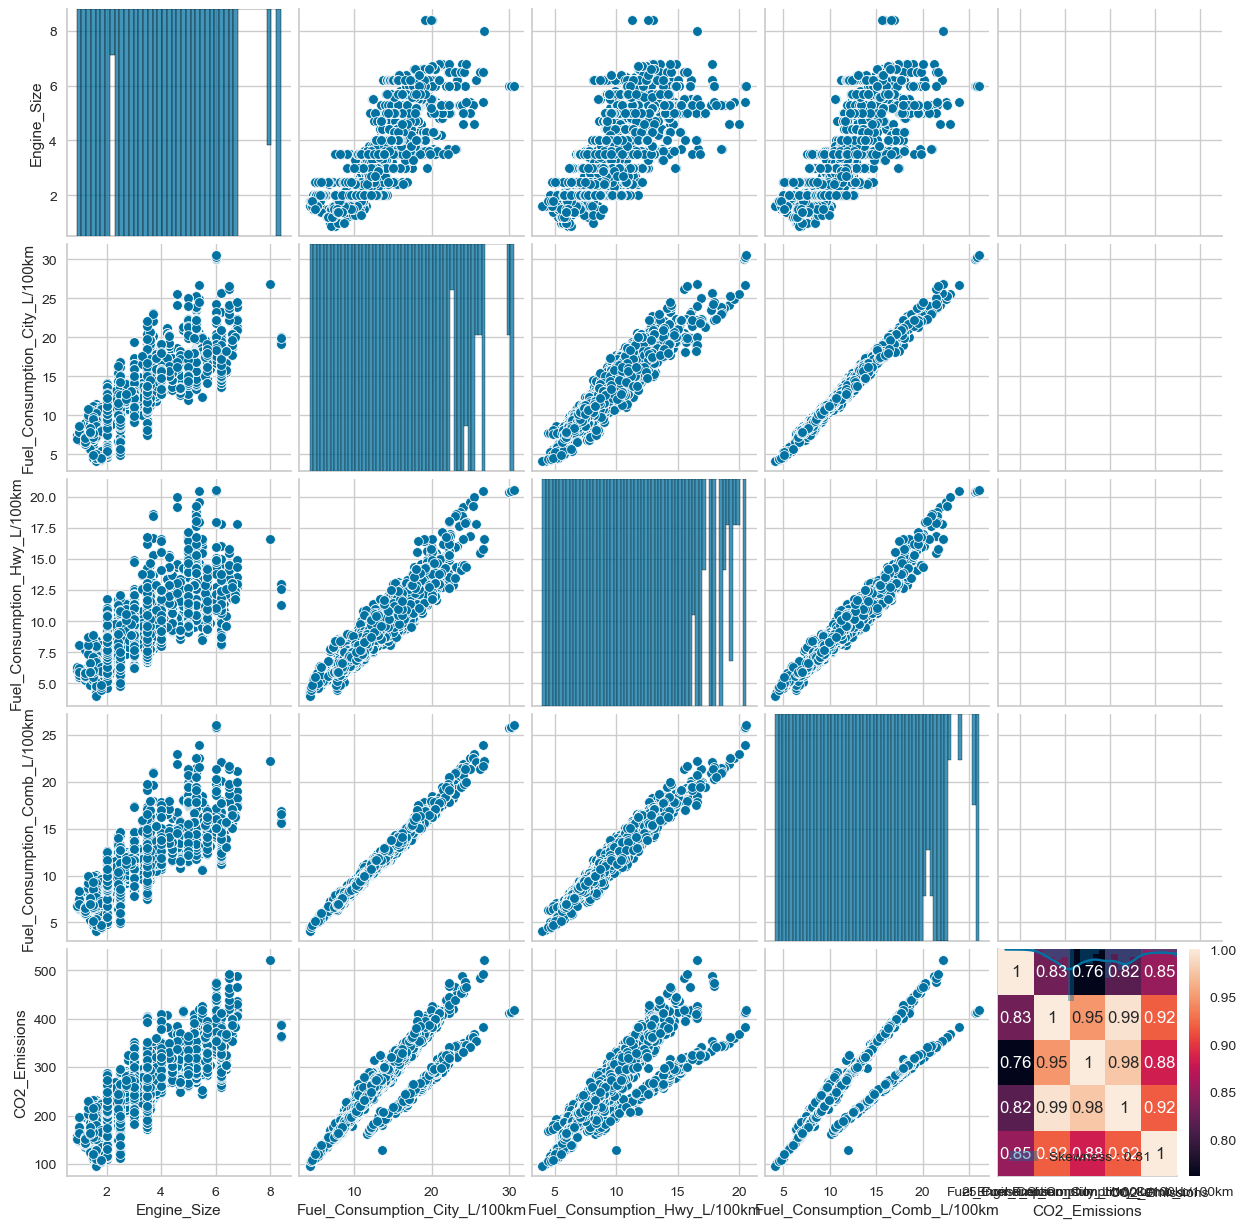

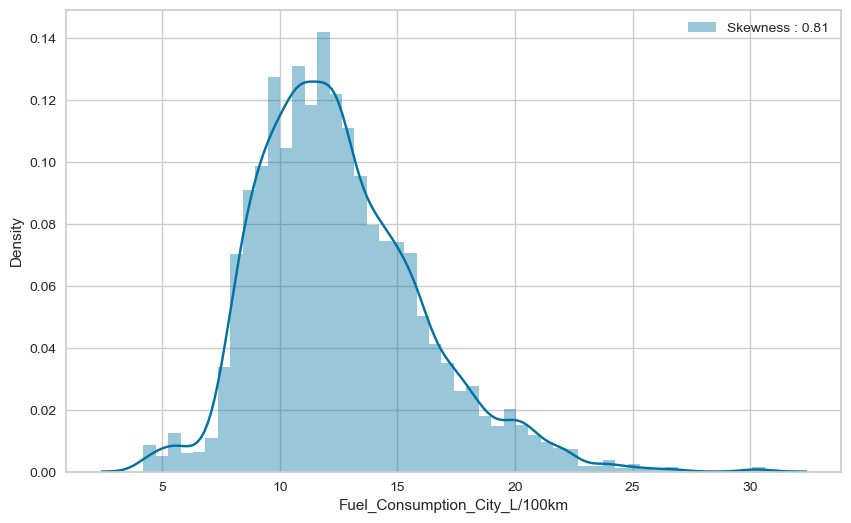

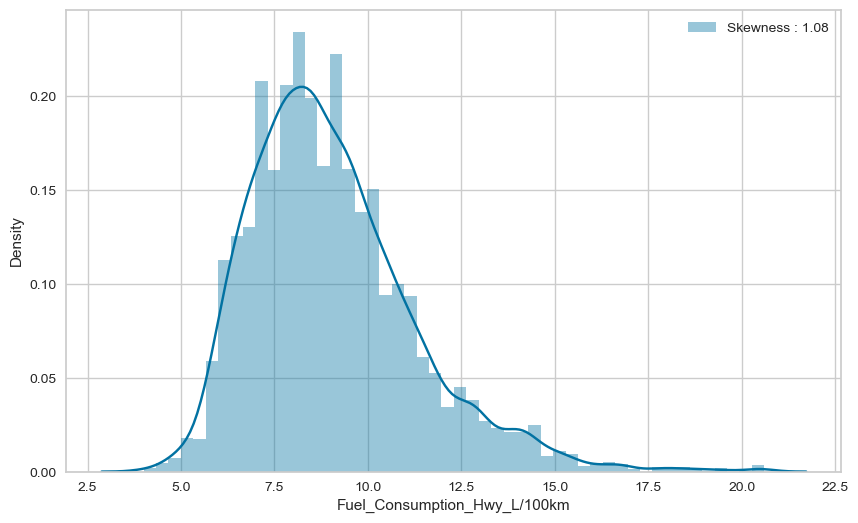

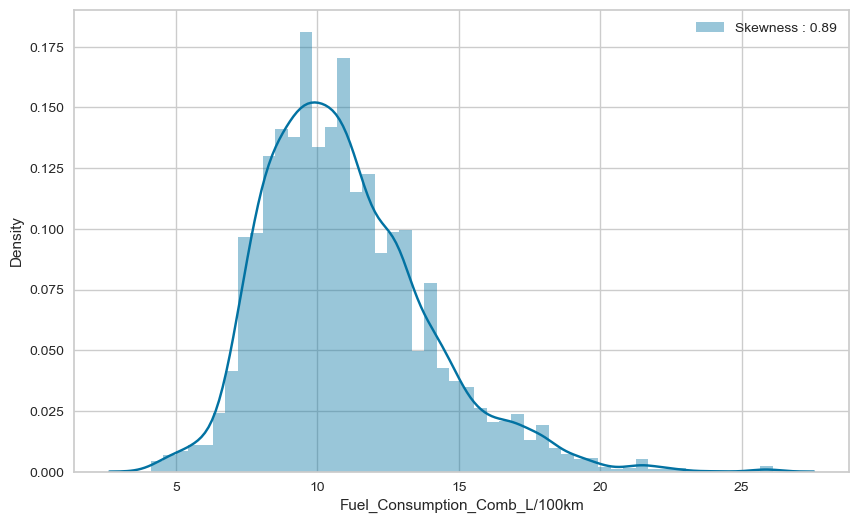

In [150]:
for j in df.drop(columns = "CO2_Emissions").columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [151]:
df.corr()

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
Engine_Size,1.000000,0.831379,0.761526,0.817060,0.851145
Fuel_Consumption_City_L/100km,0.831379,1.000000,0.948180,0.993810,0.919592
Fuel_Consumption_Hwy_L/100km,0.761526,0.948180,1.000000,0.977299,0.883536
Fuel_Consumption_Comb_L/100km,0.817060,0.993810,0.977299,1.000000,0.918052
CO2_Emissions,0.851145,0.919592,0.883536,0.918052,1.000000


In [152]:
sns.pairplot(df);

In [153]:
df.columns

Index(['Engine_Size', 'Fuel_Consumption_City_L/100km',
       'Fuel_Consumption_Hwy_L/100km', 'Fuel_Consumption_Comb_L/100km',
       'CO2_Emissions'],
      dtype='object')

# Train - Test Split

In [154]:
X = df.drop(columns = "CO2_Emissions")

y = df["CO2_Emissions"]

print(X, y)

      Engine_Size  Fuel_Consumption_City_L/100km  \
0             2.0                            9.9   
1             2.4                           11.2   
2             1.5                            6.0   
3             3.5                           12.7   
4             3.5                           12.1   
...           ...                            ...   
7380          2.0                           10.7   
7381          2.0                           11.2   
7382          2.0                           11.7   
7383          2.0                           11.2   
7384          2.0                           12.2   

      Fuel_Consumption_Hwy_L/100km  Fuel_Consumption_Comb_L/100km  
0                              6.7                            8.5  
1                              7.7                            9.6  
2                              5.8                            5.9  
3                              9.1                           11.1  
4                              8.7 

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [157]:
df.sample(20)

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
4084,2.0,11.1,8.5,10.0,233
1788,3.7,13.1,9.0,11.2,258
5942,2.4,9.3,7.1,8.3,198
3348,2.0,11.9,8.4,10.3,243
5250,1.8,8.9,6.8,8.0,187
3410,4.4,14.7,9.7,12.5,292
5514,2.0,9.5,6.9,8.3,194
1218,3.0,11.9,8.5,10.4,239
6427,3.5,10.7,7.4,9.2,215
6025,1.6,4.6,5.1,4.8,114


In [158]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape : (2216, 4)
Y Test features shape : (2216,)


In [159]:
df.head()

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


## Model Fitting and Compare Actual and Predicted Labels

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression() 

In [162]:
model.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = model.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

In [164]:
model.coef_

array([12.63210709,  2.68240309,  0.44286467, 10.20241882])

In [165]:
X_test.head()

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km
7261,3.0,12.4,9.0,10.9
4489,4.4,17.3,11.6,14.7
1539,6.2,16.1,11.4,14.0
3532,5.3,14.6,10.3,12.7
6418,4.0,14.3,11.9,13.2


In [166]:
model.intercept_

61.14287465659666

In [167]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [168]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
...,...,...,...
5123,313,293.635087,19.364913
5359,193,205.449620,-12.449620
7294,200,203.355826,-3.355826
2569,224,217.087134,6.912866


In [169]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
3703,406,342.960412,63.039588
5976,242,240.829298,1.170702
4332,216,212.685207,3.314793
5015,246,233.551606,12.448394
2087,223,224.824529,-1.824529


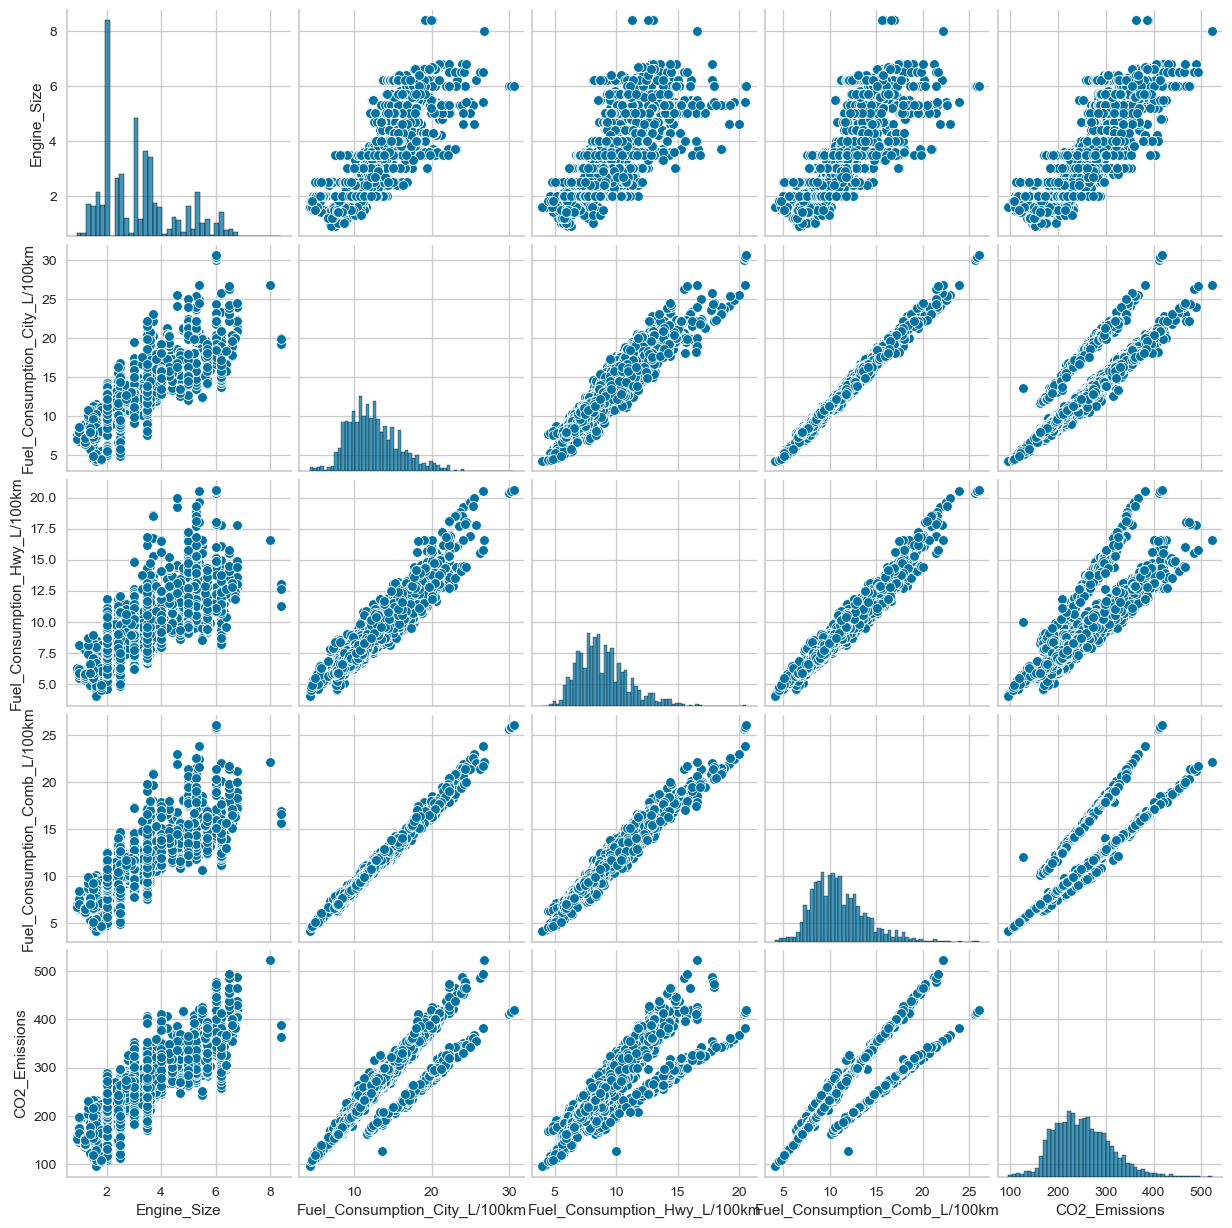

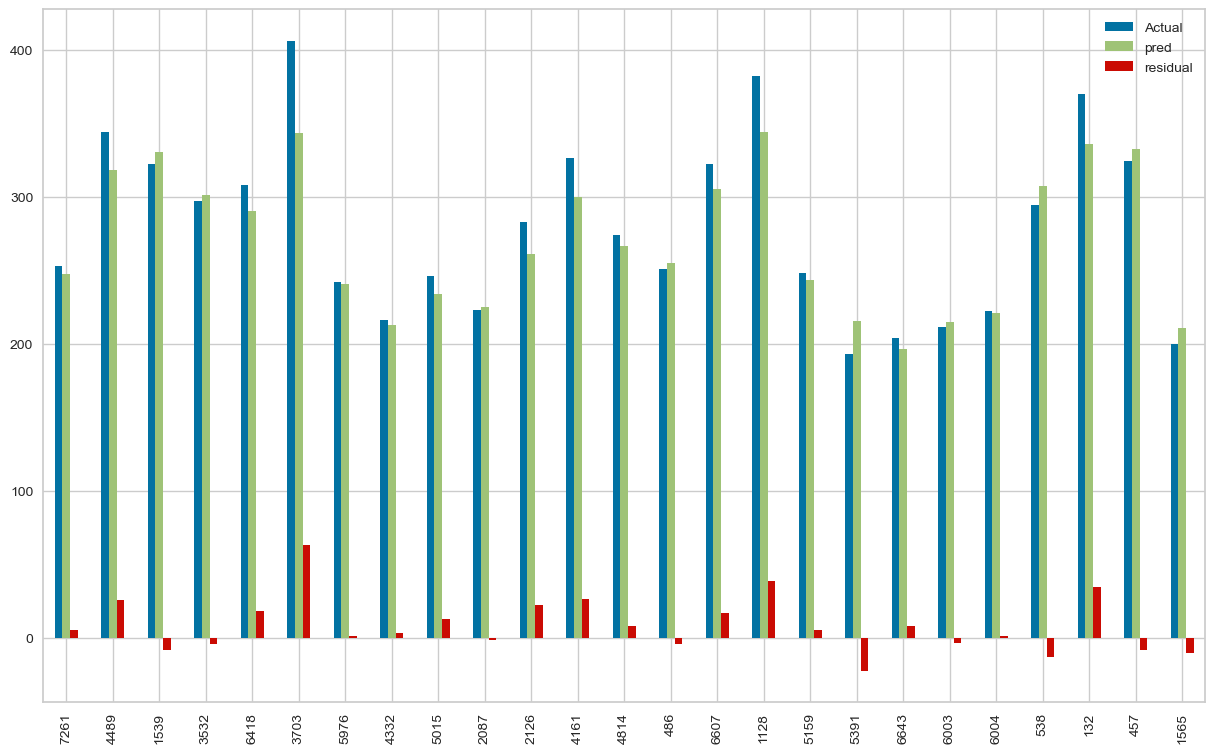

In [170]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

# Error Metrics

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [172]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.8696343237869403

In [173]:
mae = mean_absolute_error(y_test, y_pred)
mae

13.480594300830532

In [174]:
mse = mean_squared_error(y_test, y_pred)
mse

440.3368664459095

In [175]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

20.984205165931577

# Evaluation Model

In [176]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [177]:
y_train_pred = model.predict(X_train)

In [181]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8753401034629793
MAE 		: 13.398753941235901
MSE 		: 429.0443041489846
RMSE 		: 20.713384661831213


In [182]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830532
MSE 		: 440.3368664459095
RMSE 		: 20.984205165931577


# Is data suitable for linear regression?

In [183]:
residuals = y_test - y_pred

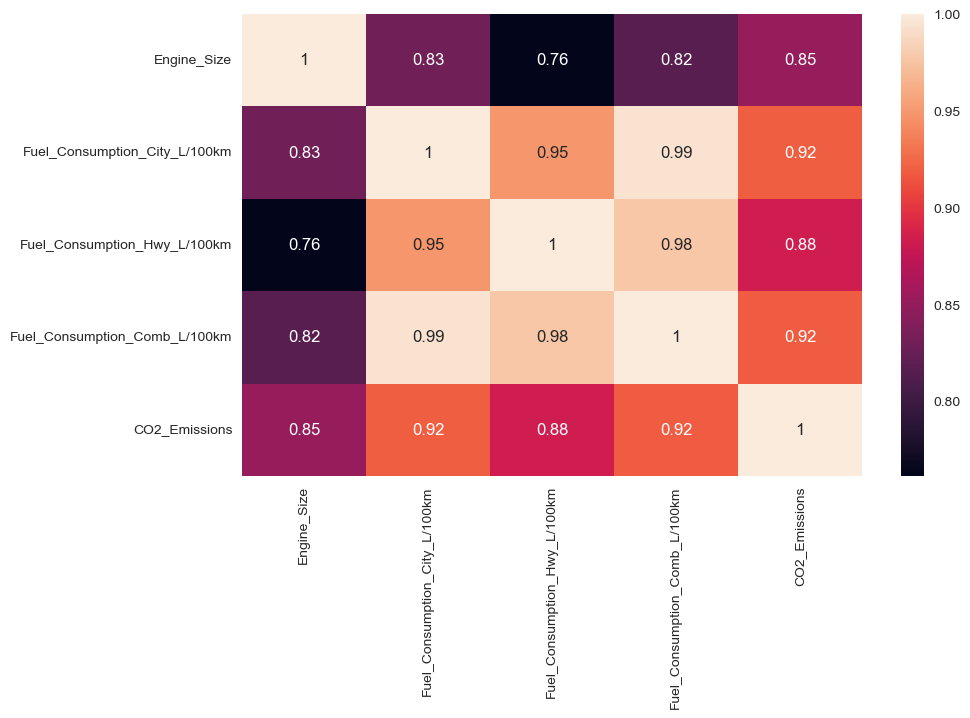

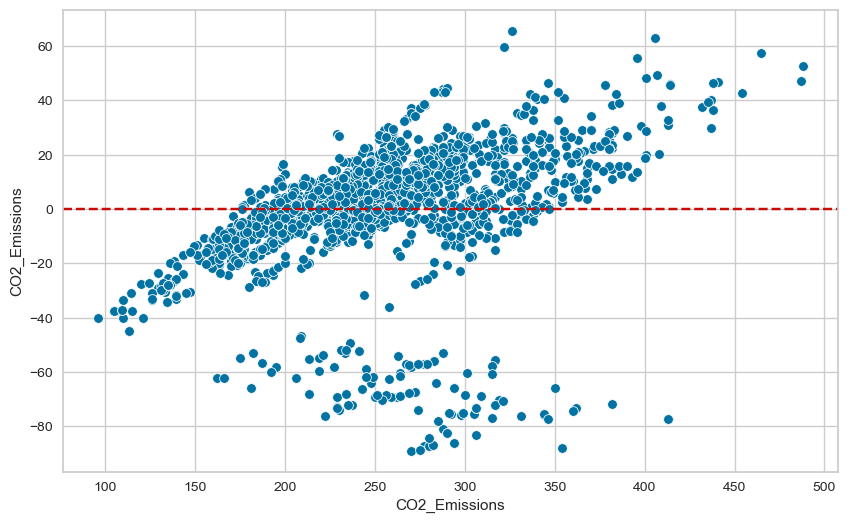

In [184]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y=residuals)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.show()

In [185]:
sns.kdeplot(residuals);

In [186]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [187]:
from scipy.stats import skew

In [188]:
skew(residuals)

-1.5482781348749253

In [189]:
!pip install yellowbrick

In [190]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

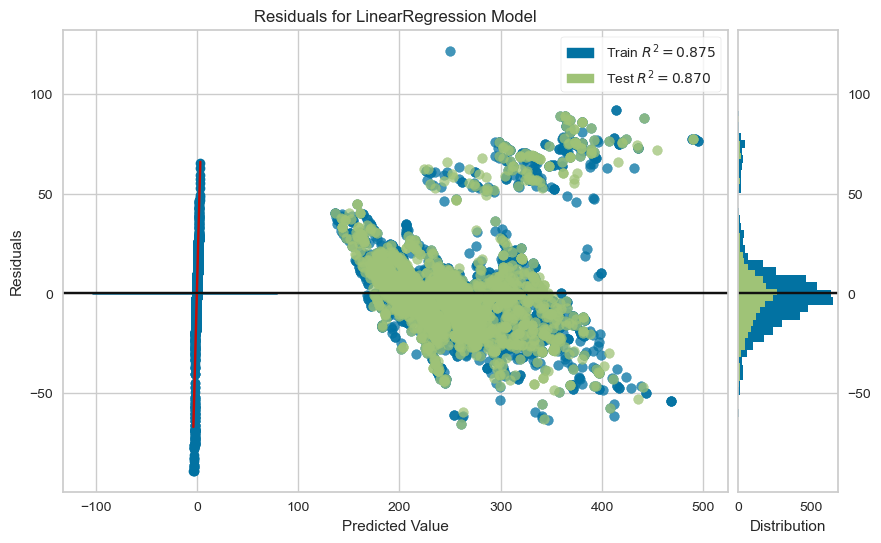

In [191]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

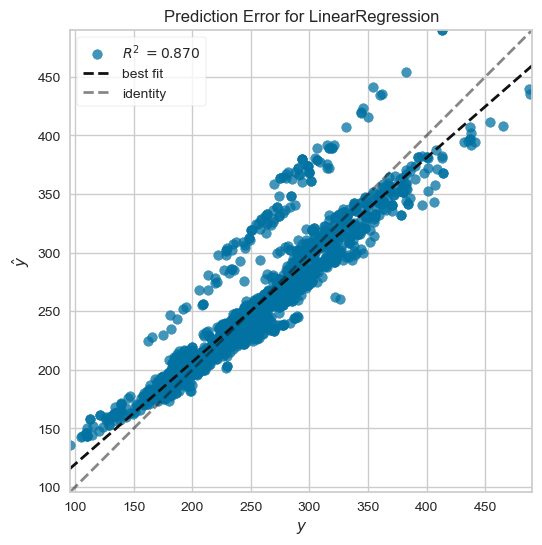

In [192]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();


# Retraining Model on Full Data

In [193]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

# Coefficients

In [194]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [195]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

,Coefficient
Engine_Size,12.837828
Fuel_Consumption_City_L/100km,2.975031
Fuel_Consumption_Hwy_L/100km,0.831878
Fuel_Consumption_Comb_L/100km,9.457528


In [196]:
df.head()

,Engine_Size,Fuel_Consumption_City_L/100km,Fuel_Consumption_Hwy_L/100km,Fuel_Consumption_Comb_L/100km,CO2_Emissions
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [197]:
final_model.intercept_

61.341573669161704

In [198]:
final_model.predict(X)

array([202.43261059, 222.67044135, 159.07281134, ..., 226.39178562,
       220.87169534, 231.74550027])